In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cf = pd.read_csv("cf_filled.csv")
pf = pd.read_csv("pf_filled.csv")

cf.index = pd.to_datetime(cf['Time'],utc=True)
pf.index = pd.to_datetime(pf['Time'],utc=True)

cf = cf.sort_index()
pf = pf.sort_index()

cf['year']=cf.index.year
cf['month']=cf.index.month
cf['weekday']=cf.index.weekday
cf['hour']=cf.index.hour

pf['year']=pf.index.year
pf['month']=pf.index.month
pf['weekday']=pf.index.weekday
pf['hour']=pf.index.hour

pf.head(4)

,Time,prod_k28,prod_h16,prod_h22,prod_h28,prod_h32,year,month,weekday,hour
Time,,,,,,,,,,
2020-12-22 00:00:00+00:00,2020-12-22 00:00:00,0.0,0.0,0.0,0.0,0.0,2020,12,1,0
2020-12-22 01:00:00+00:00,2020-12-22 01:00:00,0.0,0.0,0.0,0.0,0.0,2020,12,1,1
2020-12-22 02:00:00+00:00,2020-12-22 02:00:00,0.0,0.0,0.1,0.1,0.0,2020,12,1,2
2020-12-22 03:00:00+00:00,2020-12-22 03:00:00,0.0,0.0,0.0,0.0,0.0,2020,12,1,3


In [3]:
cf.head(4)

,Time,cons_k28,cons_h16,cons_h22,cons_h28,cons_h32,year,month,weekday,hour
Time,,,,,,,,,,
2020-12-22 00:00:00+00:00,2020-12-22 00:00:00,5.0,6.3,6.3,4.9,6.6,2020,12,1,0
2020-12-22 01:00:00+00:00,2020-12-22 01:00:00,4.3,4.8,6.5,4.4,5.4,2020,12,1,1
2020-12-22 02:00:00+00:00,2020-12-22 02:00:00,4.0,4.8,4.3,3.9,4.4,2020,12,1,2
2020-12-22 03:00:00+00:00,2020-12-22 03:00:00,3.8,4.3,3.3,3.2,3.7,2020,12,1,3


# Production

Index(['prod_k28', 'prod_h16', 'prod_h22', 'prod_h28', 'prod_h32'], dtype='object')


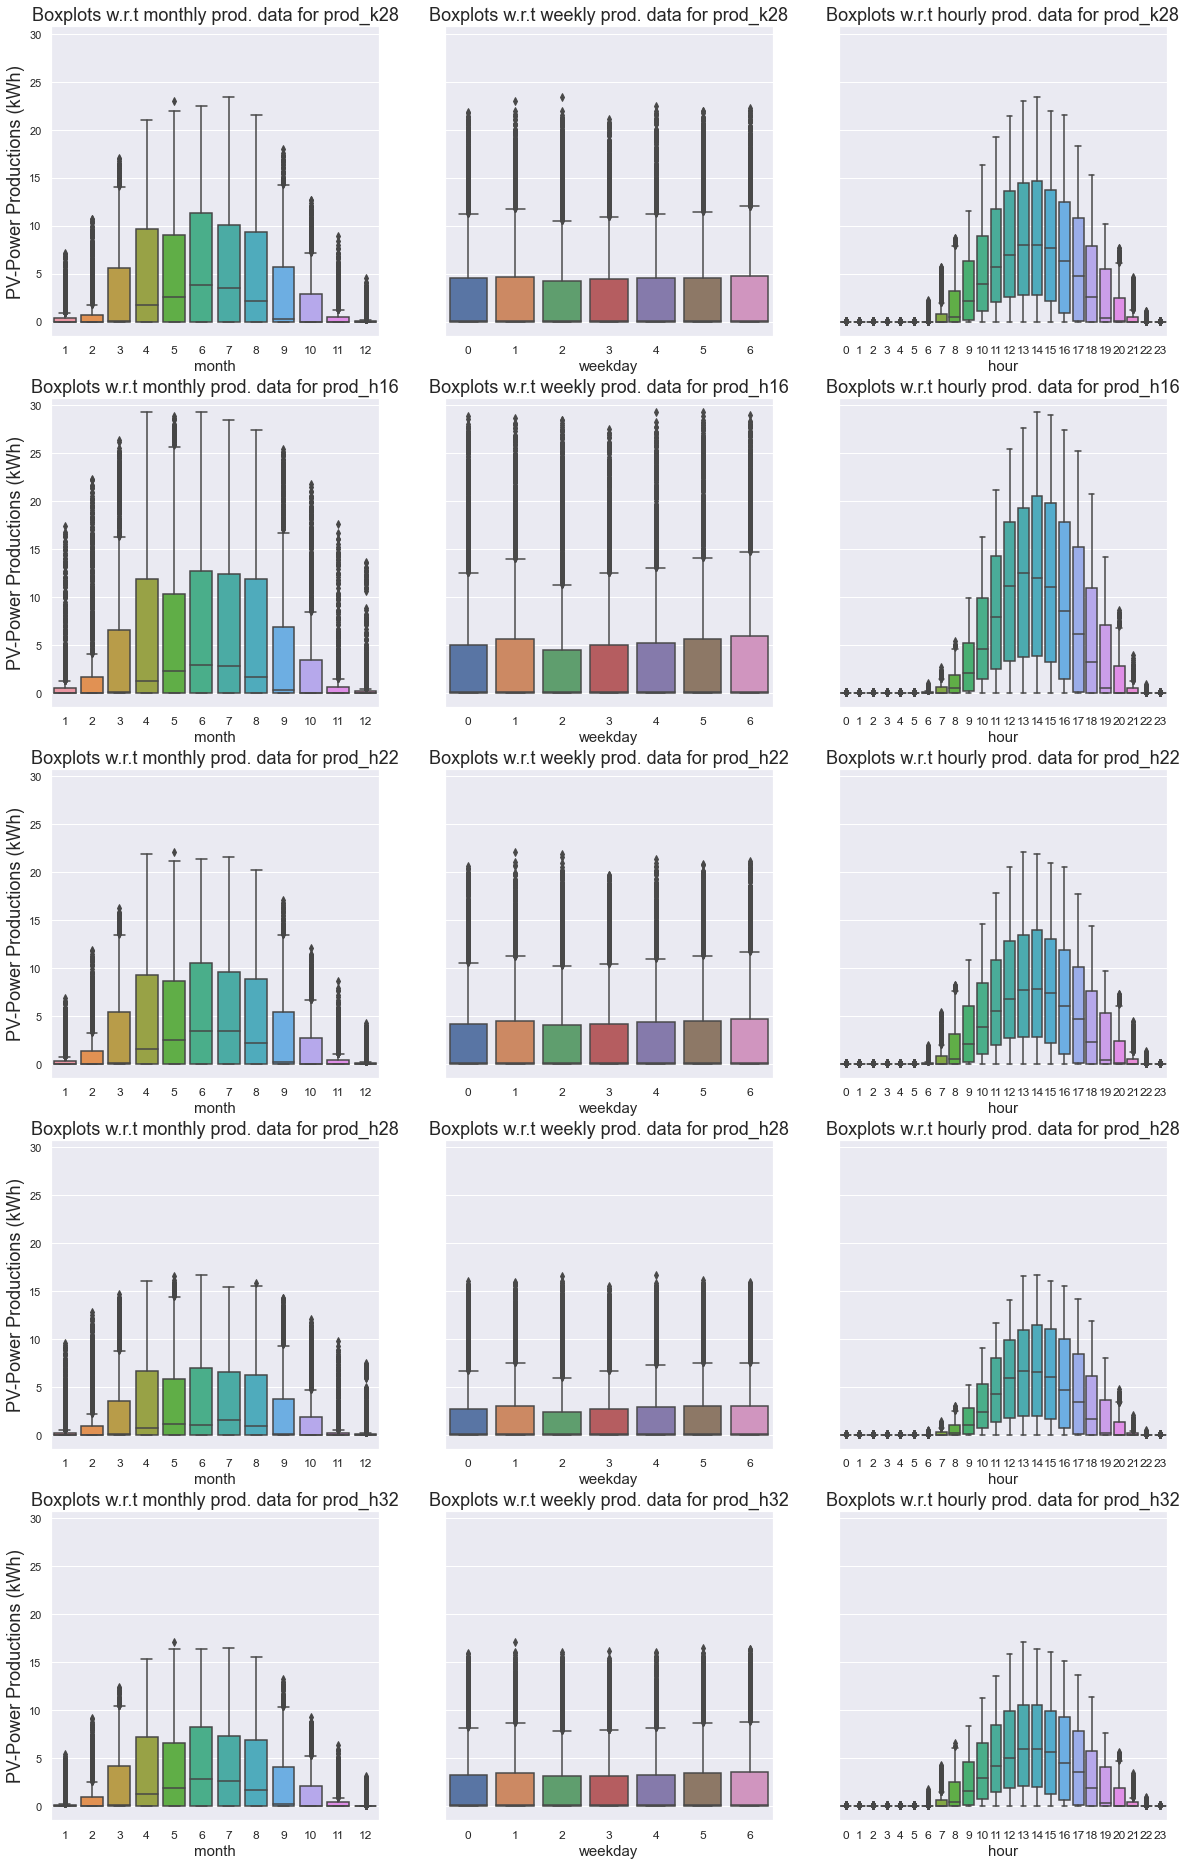

In [17]:
names = pf.columns[1:-4]
print(names)
sns.set(style="darkgrid")
sns.set_context(rc={"xtick.labelsize":12,"axes.labelsize":15})
plt.rcParams["figure.figsize"] = (20,33)
fig, axes = plt.subplots(5,3, sharey = True)
i = 0
for name in names:
    #create chart in each subplot
    sns.boxplot(x='month', y=name, data=pf, ax=axes[i,0])
    sns.boxplot(x='weekday', y=name, data=pf, ax=axes[i,1])
    sns.boxplot(x='hour', y=name, data=pf, ax=axes[i,2])
    axes[i,0].set_title(f'Boxplots w.r.t monthly prod. data for {name}', fontsize=18)
    axes[i,1].set_title(f'Boxplots w.r.t weekly prod. data for {name}', fontsize=18)
    axes[i,2].set_title(f'Boxplots w.r.t hourly prod. data for {name}', fontsize=18)
    axes[i,0].set_ylabel('PV-Power Productions (kWh)', size=18) 
    axes[i,1].set_ylabel('', size=18) 
    axes[i,2].set_ylabel('', size=18) 
    i+=1
    
plt.savefig("prod_boxplots.png")
plt.show()

Index(['prod_k28', 'prod_h16', 'prod_h22', 'prod_h28', 'prod_h32'], dtype='object')


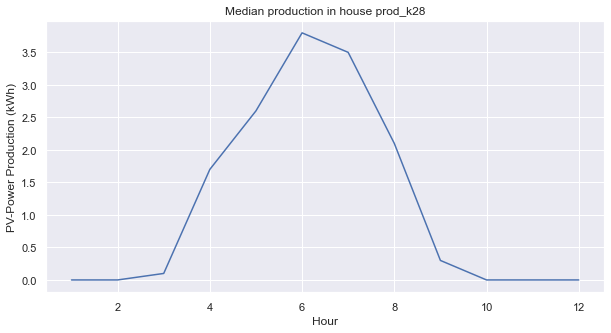

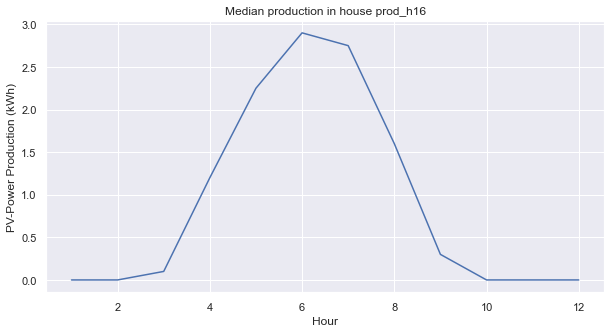

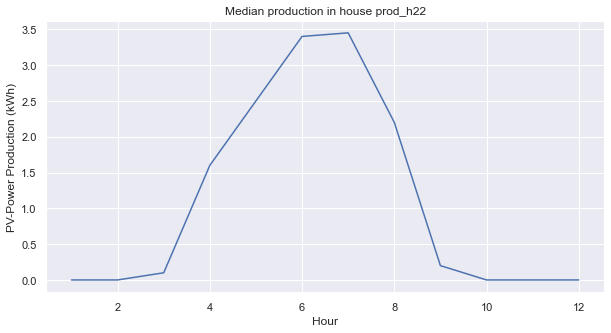

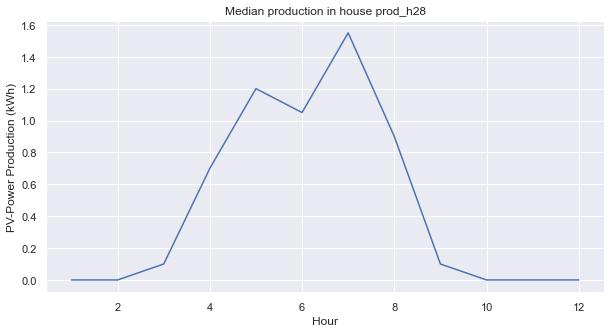

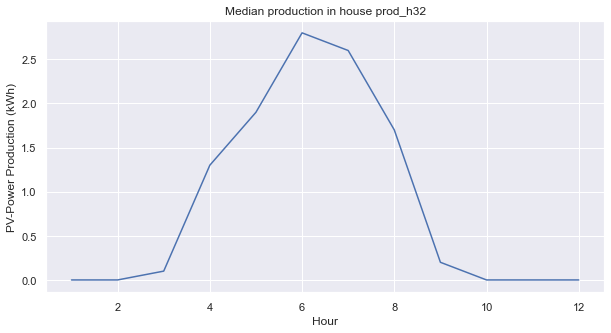

In [18]:
names = pf.columns[1:-4]
print(names)
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (10,5)

for name in names:
    plt.plot(pf.groupby('month')[name].median(), label='Median')
    plt.title(f"Median production in house {name}")
    plt.xlabel("Hour")
    plt.ylabel("PV-Power Production (kWh)")
    plt.show()

# Consumption

Index(['cons_k28', 'cons_h16', 'cons_h22', 'cons_h28', 'cons_h32'], dtype='object')


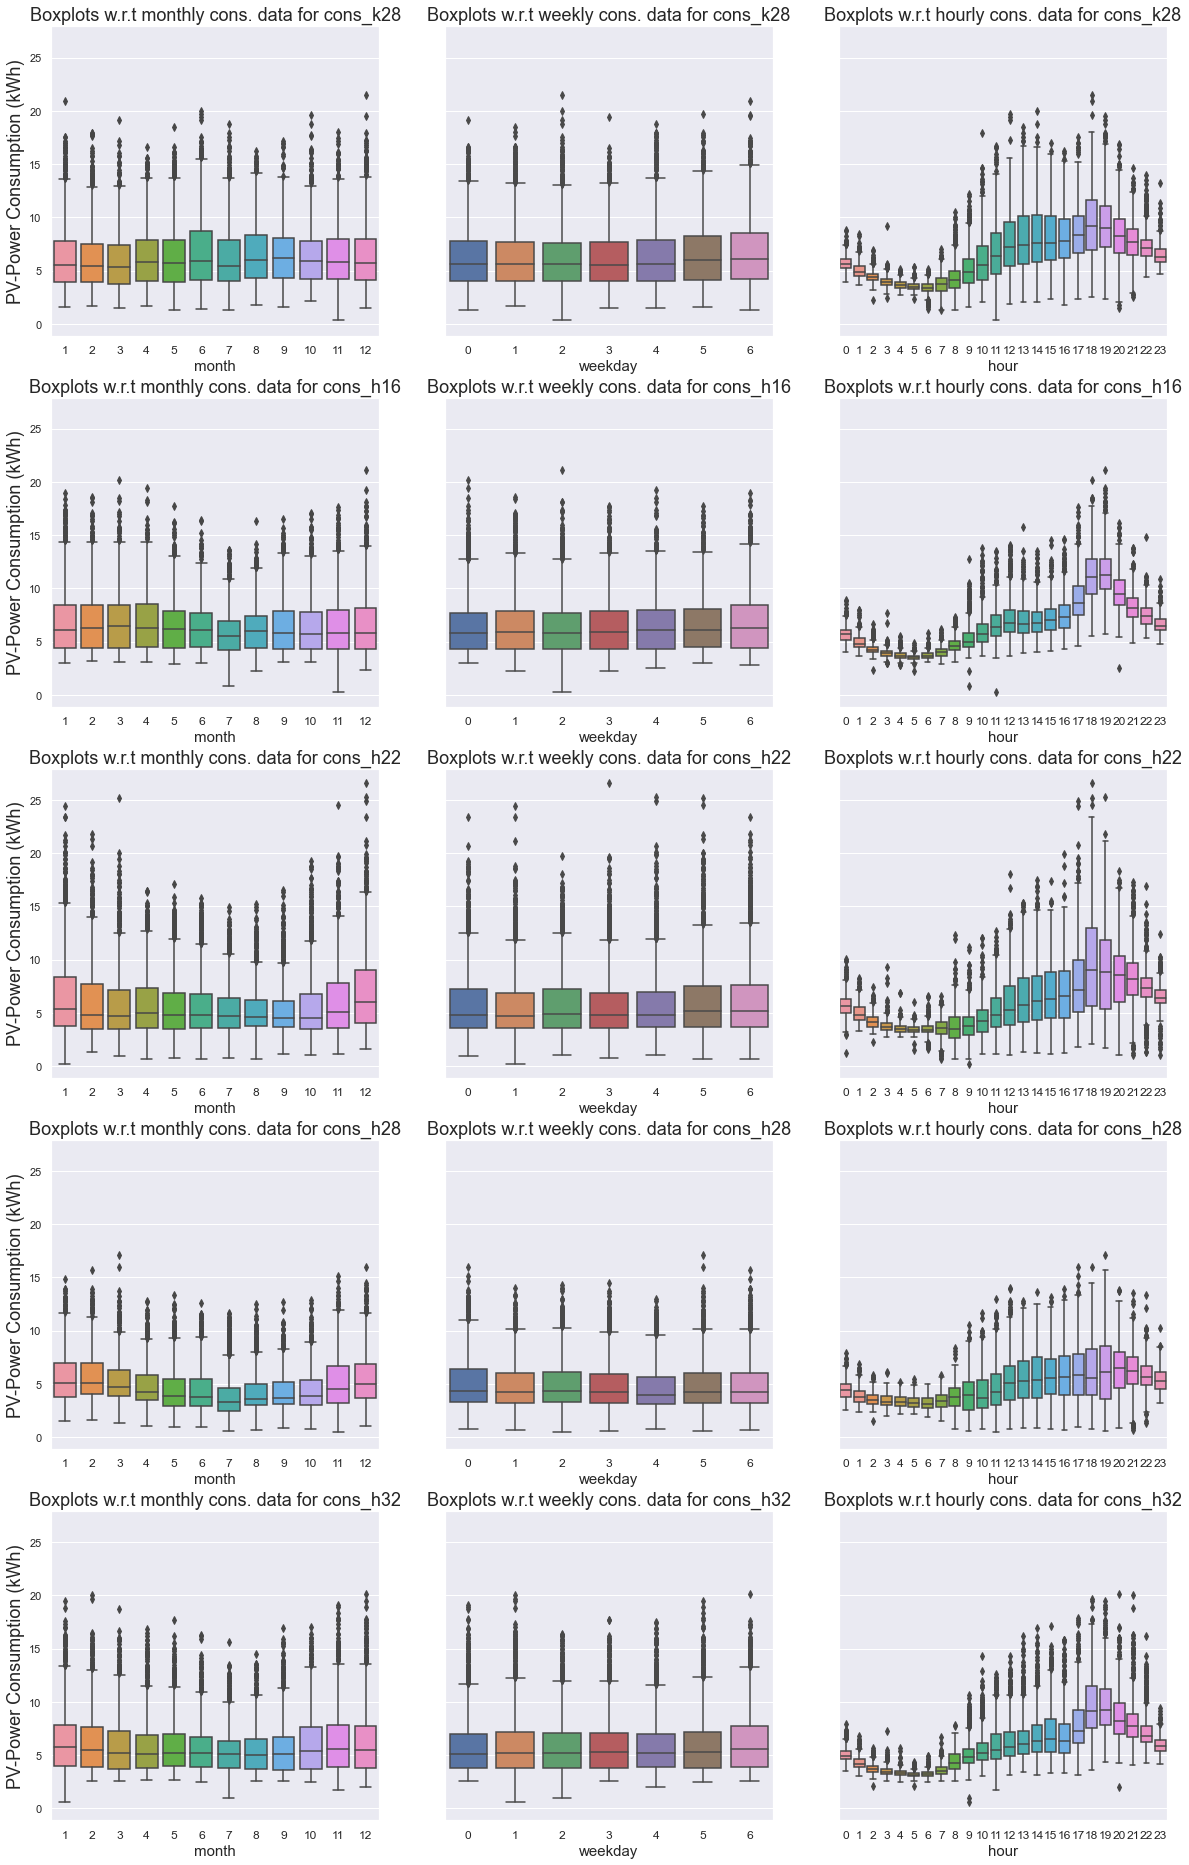

In [19]:
names = cf.columns[1:-4]
print(names)
sns.set(style="darkgrid")
sns.set_context(rc={"xtick.labelsize":12,"axes.labelsize":15})
plt.rcParams["figure.figsize"] = (20,33)
fig, axes = plt.subplots(5,3, sharey = True)
i = 0
for name in names:
    #create chart in each subplot
    sns.boxplot(x='month', y=name, data=cf, ax=axes[i,0])
    sns.boxplot(x='weekday', y=name, data=cf, ax=axes[i,1])
    sns.boxplot(x='hour', y=name, data=cf, ax=axes[i,2])
    axes[i,0].set_title(f'Boxplots w.r.t monthly cons. data for {name}', fontsize=18)
    axes[i,1].set_title(f'Boxplots w.r.t weekly cons. data for {name}', fontsize=18)
    axes[i,2].set_title(f'Boxplots w.r.t hourly cons. data for {name}', fontsize=18)
    axes[i,0].set_ylabel('PV-Power Consumption (kWh)', size=18) 
    axes[i,1].set_ylabel('', size=18) 
    axes[i,2].set_ylabel('', size=18) 
    i+=1
    
plt.savefig("cons_boxplots.png")
plt.show()

Index(['cons_k28', 'cons_h16', 'cons_h22', 'cons_h28', 'cons_h32'], dtype='object')


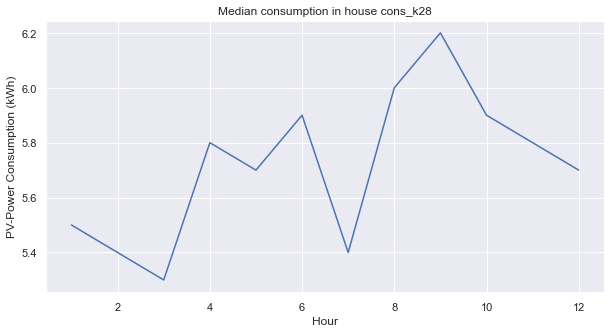

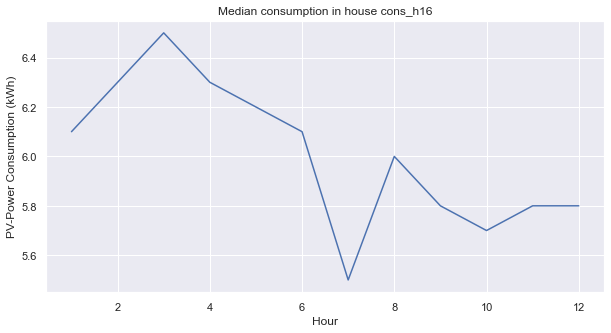

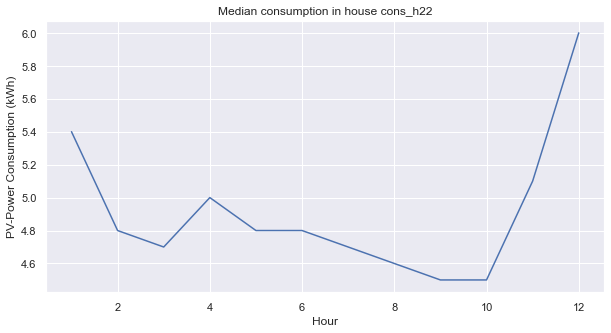

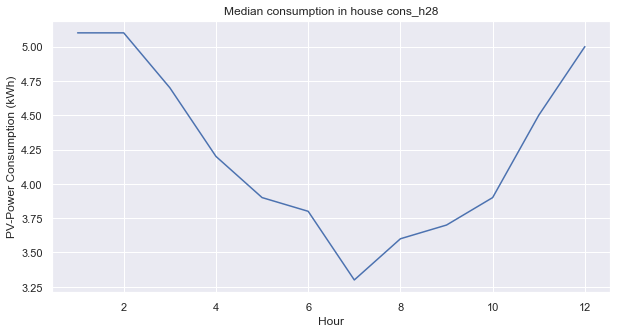

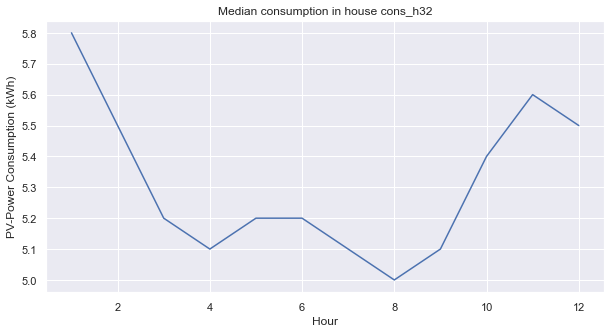

In [20]:
names = cf.columns[1:-4]
print(names)
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (10,5)

for name in names:
    plt.plot(cf.groupby('month')[name].median(), label='Median')
    plt.title(f"Median consumption in house {name}")
    plt.xlabel("Hour")
    plt.ylabel("PV-Power Consumption (kWh)")
    plt.show()